# Processing BED files IN PYTHON

As part of sending jobs to the cluster, we need a command line R script that takes as input BED file-type methylomes that have been segmented into partially methylated domains (PMDs), lowly methylated regions (LMRs), unmethylated regions (UMRs), and highly methylated domains (HMDs) by the authors of the paper "A comprehensive analysis of 195 DNA methylomes reveals shared and cell-specific features of partially methylated domains" (2018) [ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6161375/ ]. 

In [34]:
# Libraries to import

import pandas as pd
import numpy as np
import pybedtools

import seaborn as sns    # Plotting
import matplotlib
import matplotlib.pyplot as plt      
import scipy.cluster 
import sklearn.cluster

import os    # for reading in files
import sys    # For importing command line args https://www.pythonforbeginners.com/argv/more-fun-with-sys-argv


# import gzip   # Originally for reading in .gz, but read_csv achieves this

Because of size of data, I want to import and clean the data in one for loop. Also need a function that will help classify the samples into the consortium they came from. The additional material 1 in the original paper has a XLSX file that lists all the original unsegmented sample names by consortium, so matching these and the names of the segmented sample we imported will hopefully work. Link to XLSX file: https://static-content.springer.com/esm/art%3A10.1186%2Fs13059-018-1510-5/MediaObjects/13059_2018_1510_MOESM1_ESM.xlsx

In [2]:
# PANDAS HACKS I LEARNED ALONG THE WAY 


# ACCESSING DATAFRAME:

# print(df_NAs.loc[4])     # Equivalent ways of accessing rows that have numbers for names 
# print(df_NAs.iloc[0])

# print(meth_data.iloc[i]['Consortium'])
# meth_data.loc[[i],['Consortium']] = 'N'    # Replacing values in dataframe
# print(meth_data.iloc[i]['Consortium'])

# meth_data.loc[meth_data['Sample Label'] == df_NAs.iloc[27]["Sample Label"]]['Consortium']    
# Extracts the row in full sample 
# data table (meth_data) that has the sample name specified by the return of the .iloc[][] from the temporary
# dataframe df_NAs, which holds the as yet unclassified samples. So [df_NAs.iloc[0]["Sample Label"]] extracts
# the sample label of its first element but is a SLICE of that cell. 

# Extracting section of dataframe based on logical condition on certain columns
# sample_chr1 = sample_chr1.loc[sample_chr1["Segment"] == "PMD"]


# THIS IS HOW I FORMERLY INDEXED THE DATAFRAME WAS HARD TO FIGURE OUT:
# meth_data.iloc[i]['Consortium'] = patch(df_NAs.iloc[n]["Sample Label"], consortiums_unique)
# This method actually slices the dataframe first, then accesses 'Consortium', so the assignment is made to a 
# copy rather than the dataframe itself. 


# Accessing Dataframe info within Dataframe
# sample2 = (meth_data_mouseless.loc[[2], ['Full Sample']]).iloc[0].iloc[0]
# print(sample2)
# OR
# meth_data_mouseless.iloc[i]['Full Sample']      # Also gives the dataframe that was in the dataframe


# DATAFRAME TO NUMPY
# df_all_samples_np = df_all_samples.to_numpy()  # Columns correspond to sample num
# sample = (df_all_samples_np[0][full_sample_index]).to_numpy()
# sample_by_chr = sample[:, chr_sample_index] == str(chrom_names[0])
# print(sample[sample_by_chr,:])    # How to slice a part of a numpy array by logical operation


# COMBINING DATAFRAME ROWS/COLUMNS
# Testing zip() [it werks]
# iranges = list(zip(meth_data_mouseless.iloc[0]['Full Sample']['IRangeMin'], meth_data_mouseless.iloc[0]['Full Sample']['IRangeMax']))


# BOOLEAN INDEXING DOES NOT MAINTAIN THE OG DIMENSIONS INSTEAD FLATTENS ALL THE TRUES TO COME AFTER ANOHTER 1D
# Can use np.where to change values that don't conform to your condition to something else


Ignore the following commented cells, containing past function definitions that are no longer used in this program.

In [3]:
# NOT USED Code cells with my trial and error that I want to keep for reference but that are NOT USED 

# Binning PMDs -->
# SO we want a vector with the median counts of PMDs in each bin. We can find the intersection of the current
# bin and each PMD range, then add 1 PMD to our pmd_count array at that bin if the bin does indeed intersect
# with a PMD. If the start of the PMD is smaller than the end of the bin, AND the end of the PMD is larger 
# than the start of the bin, they are intersecting. 


# for sample_no in sample_total:
# binned_median_current_chr

# for higher_bin in bins:

#     if (3 * max_range) < lower_bin:   # If it's clear 
#         break
#     # if following true for bin pmd's are intersecting
#     pmd_intersecting = (max(min_range, higher_bin) - min(max_range, lower_bin) > 0)  # True or 1 if bin and range union is positive

#     binned_median_current_chr[curr_bin] add pmd_intersecting



# # For each bin, get a bool matrix of ranges that are in the current bin via logical_and and count the True's



# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# for sample_no in sample_total:
#     for higher_bin in bin_ranges:
#         # Count PMDs actually in bin
#         lower_bin = higher_bin - bin_size
#         bool_min = np.logical_and(pmd_locs_chr_min<=curr_bin, pmd_locs_chr_min>lower_bin)  # True ranges are in PMD
#         bool_max = np.logical_and(pmd_locs_chr_max<=curr_bin, pmd_locs_chr_max>lower_bin)

#         bool_sum = np.array((np.sum(bool_min, axis=1), np.sum(bool_max,axis=1)))

#         pmd_counts_bin = np.amax(bool_sum, axis=0)   # Max of each row, so if there are more max PMD ranges than min ranges, that would be the number of PMDs found in this bin
        
        
#         # Count PMDs potentially spanning the bin: get the index in the pmd locations array of the first/smallest
#         # min range that was marked as 'True' for being in the current bin. Check if the max range corresponding 
#         # to the min range right before the first min range in the bin, ie with an index one lower, is greater
#         # than the lower end of the bin. This is for PMDs that are spanning across the current bin. 

#         span_pmd_idx = np.argmax((bool_min==True), axis = 1) -1

#         if span_pmd_idx >= 0:   # If this isn't the first bin
#             sample_idx = range(len(pmd_locs_chr_max))
#             span_pmds = (pmd_locs_chr_max[sample_idx, span_pmd_idx] > lower_bin)
#             pmd_counts_bin = (pmd_counts_bin) + (span_pmds)   


# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            
        
        




# sample_total = len(pmd_locs_chr_min)
# pmd_counts_2 = np.zeros([sample_total, 1])    # You gotta understand what where(logical_and()) return
# row_coords_min_slice, useless_col_coords = np.where(np.logical_and(pmd_locs_chr_min<=curr_bin, pmd_locs_chr_min>lower_bin))  # https://stackoverflow.com/questions/13869173/numpy-find-elements-within-range
# row_coords_max_slice, useless_col_coords = np.where(np.logical_and(pmd_locs_chr_max<=curr_bin, pmd_locs_chr_max>lower_bin))  # https://stackoverflow.com/questions/13869173/numpy-find-elements-within-range

# pmds_in_next_bin = 0
# for sample_no in range(sample_total):
    
#     min_count = len(row_coords_min_slice[row_coords_min_slice == sample_no])   # Count how many range occurences there are in current sample
#     max_count = len(row_coords_max_slice[row_coords_max_slice == sample_no])
    
#     pmd_counts_2[sample_no] = pmds_in_next_bin + max(min_count, max_count)
    
#     pmds_joined = pmds_in_next_bin - abs(max_count - min_count)    # PMDs going into next bin = PMDs that went this bin - the subset of those that stopped in this bin
#     pmds_in_next_bin = pmds_in_next_bin - pmds_joined
    
    
    
# print('pmd_counts_2', pmd_counts_2) 
# print('where',np.where(np.logical_and(pmd_locs_chr_min<=curr_bin, pmd_locs_chr_min>lower_bin)))





    
# print('max count nonzero', np.count_nonzero(~np.isnan(pmd_locs_sliced_max)))
# # print('pmd_locs_sliced_max', pmd_locs_sliced_max)
# print('shape',pmd_locs_sliced_max.shape)
# pmd_counts = np.zeros([sample_total, 1])         # Doesn't solve problem that size of min and max arrays have different shapes
# pmd_span_flag = False
# for sample_no in range(sample_total):
#     edge_PMDs = 0     # Count of PMDs running into or out of current bin

#     # Check for spanning PMD's that cross over this bin
#     if (not bin_has_ranges) and pmd_span_flag:     # If bin is empty but a PMD range is spanning it
#         edge_PMDs += 1   

#     # Check for incoming PMD's
#     if pmd_locs_sliced_max[sample_no, 0] > pmd_locs_sliced_min[sample_no, 0]:
#         pmd_span_flag = False     # PMD entering this bin
#         edge_PMDs += 1

#     # Check PMD's spanning out of current bin (ie the largest range is a start range)
#     if pmd_locs_sliced_min[sample_no, -1] > pmd_locs_sliced_max[sample_no, -1]:    # If last start is bigger than last end
#         pmd_span_flag = True     # PMD leaving this bin
#         edge_PMDs += 1

# #     print('np.count_nonzero(~np.isnan(pmd_locs_sliced_max[sample_no]))', np.count_nonzero(~np.isnan(pmd_locs_sliced_max[sample_no])))
#     pmd_counts[sample_no] = np.count_nonzero(~np.isnan(pmd_locs_sliced_max[sample_no])) + np.count_nonzero(~np.isnan(pmd_locs_sliced_min[sample_no])) + edge_PMDs   # Counts the number of ranges 
# #         pmd_counts_curr_median = 

# print(pmd_counts[0:173,:])

# Binning PMDs <--


In [4]:
# # Creates list of the number of pmd's in each sample in the sliced np array
# # NOT USING SINCE 23/09/19
# def count_pmds(pmd_locs_sliced_min, pmd_locs_sliced_max, pmd_span_flag):
    
#     # Size flags
#     min_empty =  (len(pmd_locs_sliced_min) == 0)   # Bools check if np array is completely empty and unusable
#     max_empty =  (len(pmd_locs_sliced_max) == 0)
    
#     if ((not min_empty) and (not max_empty)):   # If neither the min or max PMD IRange arrays are empty
#         bin_has_ranges = ((pmd_locs_sliced_max[0].size) > 0) or ((pmd_locs_sliced_min[0].size) > 0)
#     else: bin_has_ranges = not min_empty or not max_empty
    
    
#     # Shape difference handling
#     larger_row_count = max(pmd_locs_sliced_min.shape[0], pmd_locs_sliced_max.shape[0])  
#     sample_total = larger_row_count
    
#     if not min_empty:    # Make row dimension equal in min and max range arrays
#         slice_shape = larger_row_count - pmd_locs_sliced_min.shape[0] 
# #         print('slice_shape min', slice_shape)
#         pmd_locs_sliced_min = np.append(pmd_locs_sliced_min, np.full(slice_shape, np.nan))
#     if not max_empty:
#         slice_shape = larger_row_count - pmd_locs_sliced_max.shape[0] 
# #         print('slice_shape max', slice_shape)
#         pmd_locs_sliced_max = np.append(pmd_locs_sliced_max, np.full(slice_shape, np.nan))
    
#     #   Empty Arrays
#     if min_empty:     # If there are no PMD ranges in entire array, make the np array a nan column
#         pmd_locs_sliced_min = np.full((sample_total, 1), np.nan)
#     if max_empty:
#         pmd_locs_sliced_max = np.full((sample_total, 1), np.nan)
        
#     #   Reshape 1d array to 2d with 1 column 
#     if len(pmd_locs_sliced_min.shape) == 1:    # If there are no columns
#         pmd_locs_sliced_min = np.reshape(pmd_locs_sliced_min, (pmd_locs_sliced_min.shape[0], 1))
#     if len(pmd_locs_sliced_max.shape) == 1:
#         pmd_locs_sliced_max = np.reshape(pmd_locs_sliced_max, (pmd_locs_sliced_max.shape[0], 1))
    
    

#     pmd_counts = np.zeros([sample_total, 1])         # Doesn't solve problem that size of min and max arrays have different shapes
    
#     for sample_no in range(sample_total):
#         edge_PMDs = 0     # Count of PMDs running into or out of current bin

        

#         # Cases for PMD ranges per bin:
#         # cond 1: nothing, but span is true -- edge +1
#         # cond 2: end without start -- span false, edge +1
#         # cond 3: start without end -- span true, edge +2

        
#         # Check for spanning PMD's that cross over this bin
#         if (not bin_has_ranges) and pmd_span_flag:     # If bin is empty but a PMD range is spanning it
#             edge_PMDs += 1   
        
#         # Check for incoming PMD's
#         if pmd_locs_sliced_max[sample_no, 0] > pmd_locs_sliced_min[sample_no, 0]:
#             pmd_span_flag = False     # PMD entering this bin
#             edge_PMDs += 1
        
#         # Check PMD's spanning out of current bin (ie the largest range is a start range)
#         if pmd_locs_sliced_min[sample_no, -1] > pmd_locs_sliced_max[sample_no, -1]:    # If last start is bigger than last end
#             pmd_span_flag = True     # PMD leaving this bin
#             edge_PMDs += 1
            

#         print('np.count_nonzero(~np.isnan(pmd_locs_sliced_max[sample_no]))', np.count_nonzero(~np.isnan(pmd_locs_sliced_max[sample_no])))
        
#         pmd_counts[sample_no] = np.count_nonzero(~np.isnan(pmd_locs_sliced_max[sample_no])) + np.count_nonzero(~np.isnan(pmd_locs_sliced_min[sample_no])) + edge_PMDs   # Counts the number of ranges 
# #         pmd_counts_curr_median = 

#     return pmd_counts


In [5]:
# SNIPPETS THAT I LEARNED A LOT FROM

# # Slice away indices that start before 0 and nan's
# span_pmd_idx = ([value for value in (span_pmd_idx) if value[1]>0 else return np.nan])

# Functions for Classifying Data

Functions for handling data annotation.

1. patch(): Classifying samples that were not explicitly represented in the supplementary material excel score from the Salhab paper since the cell types of each sample were not included in the bed file of the sample.

2. correct(): Minor misspellings fixed

3. get_median(): return median of a dataframe column of choice

4. classifyConsortium(): Assigns consortium based on the dictionary of sample names by consortium, which were taken from the aforementioned suplementary information Excel file Salhab 2018 and put in python dictionary. The information could be saved in a JSON file instead of keeping it in one dictionary.

In [6]:
# Function for patching yet unclassified samples by a given list
def patch(sampleName, categories):
    # Categories is a list of the unique keywords that can classify the sample taken from a dataframe as 
    # a numpy array.
    for category in categories:
        nameStatus = sampleName.find(str(category))
        if nameStatus >= 0:   # If a match in str.find() is found
            return category
    return "Unknown"

In [7]:
# Function for replacing mislabelled cases
def correct(misspelled_str):
    # Reference words
    exception_names = {"Bcell":"B cell",   "mammay":"mammary glands", "cmucosa": "mucous", 
                   "TCD8": "T cell",  "TCD4": "T cell"}
    for wrong_word, corrected_word in exception_names.items():
        name_status = misspelled_str.find(wrong_word)
        if name_status >= 0:
            return corrected_word             # Find the misspelled word and replace it, or throw it back.
    return misspelled_str

In [8]:
# Function for getting the median methylation 'score' in a column, grouped by another parameter 
def get_median(scores_df, group_name):
    scores_df = scores_df[group_name]
    median = scores_df.median(axis=1, skipna = True)
    return median

In [9]:
# Function for annotating samples by consortium

def classifyConsortium(dfName):    # Returns sample's Consortium and CellType
    consortiums = {
        "DEEP": {
            "01_HepaRG_LiHR_D31": "HepaRG",
            "01_HepG2_LiHG_Ct1": "HepG2",
            "41_Hf01_LiHe_Ct": "hepatocyte",
            "41_Hf02_LiHe_Ct": "hepatocyte",
            "41_Hf03_LiHe_Ct": "hepatocyte",
            "43_Hm01_BlMo_Ct": "monocyte",
            "43_Hm03_BlMa_Ct": "macrophage",
            "43_Hm03_BlMa_TE": "macrophage",
            "43_Hm03_BlMa_TO": "macrophage",
            "43_Hm03_BlMo_Ct": "monocyte",
            "43_Hm05_BlMa_Ct": "macrophage",
            "43_Hm05_BlMa_TE": "macrophage",
            "43_Hm05_BlMa_TO": "macrophage",
            "43_Hm05_BlMo_Ct": "monocyte",
            "51_Hf03_BlCM_Ct": "central memory CD4-positive, alpha-beta T cell",
            "51_Hf03_BlEM_Ct": "central memory CD4-positive, alpha-beta T cell",
            "51_Hf03_BlTN_Ct": "naive CD4-positive T cell",
            "51_Hf04_BlCM_Ct": "central memory CD4-positive, alpha-beta T cell",
            "51_Hf04_BlEM_Ct": "central memory CD4-positive, alpha-beta T cell",
            "51_Hf04_BlTN_Ct": "naive CD4-positive T cell",
            "51_Hf05_BlTA_Ct": "CD4-positive, alpha-beta memory T cell",

        },
        "BP": {
            'S00UJK51': 	'adult endothelial progenitor cell',
            'S01GU951': 	'adult endothelial progenitor cell',
            'S00E8W51': 	'alternatively activated macrophage',
            'S0062252': 	'alternatively activated macrophage',
            'S006VI53': 	'alternatively activated macrophage',
            'S00BS451':	'alternatively activated macrophage',
            'S00FTN51': 	'alternatively activated macrophage',
            'S00JGXA1': 	'band form neutrophil',
            'S00VEQA1': 	'band form neutrophil',
            'S00JMLA1': 	'band form neutrophil',
            'C005PS51': 	'CD14-positive, CD16-negative classical monocyte',
            'S000RD54': 	'CD14-positive, CD16-negative classical monocyte',
            'C000S5A1bs': 	'CD14-positive, CD16-negative classical monocyte',
            'C0010KA2bs': 	'CD14-positive, CD16-negative classical monocyte',
            'C001UYA3bs': 	'CD14-positive, CD16-negative classical monocyte',
            'C004SQ51': 	'CD14-positive, CD16-negative classical monocyte',
            'NECH0001_1': 	'CD3-negative, CD4-positive, CD8-positive, double positive thymocyte',
            'S010NDA1': 	'CD3-negative, CD4-positive, CD8-positive, double positive thymocyte',
            'S01G2SA1': 	'CD3-positive, CD4-positive, CD8-positive, double positive thymocyte',
            'S010Q7A1': 	'CD3-positive, CD4-positive, CD8-positive, double positive thymocyte',
            'C003K951': 	'CD38-negative naive B cell',
            'C0068L51': 	'CD38-negative naive B cell',
            'S00DM851': 	'CD38-negative naive B cell',
            'P581': 	'CD4-positive, alpha-beta T cell',
            'P582': 	'CD4-positive, alpha-beta T cell',
            'P583': 	'CD4-positive, alpha-beta T cell',
            'P584': 	'CD4-positive, alpha-beta T cell',
            'P585': 	'CD4-positive, alpha-beta T cell',
            'P586': 	'CD4-positive, alpha-beta T cell',
            'P580': 	'CD4-positive, alpha-beta T cell',
            'S007DD51': 	'CD4-positive, alpha-beta T cell',
            'S007G756': 	'CD4-positive, alpha-beta T cell',
            'S008H151': 	'CD4-positive, alpha-beta T cell',
            'S009W451': 	'CD4-positive, alpha-beta T cell',
            'NECH0001_2': 	'CD4-positive, alpha-beta thymocyte',
            'S010R5A1': 	'CD4-positive, alpha-beta thymocyte',
            'C0066P51': 	'CD8-positive, alpha-beta T cell',
            'S00C2F51': 	'CD8-positive, alpha-beta T cell',
            'C00256A1bs': 	'CD8-positive, alpha-beta T cell',
            'C003VO55': 	'CD8-positive, alpha-beta T cell',
            'NECH0001_3': 	'CD8-positive, alpha-beta thymocyte',
            'S010S3A1': 	'CD8-positive, alpha-beta thymocyte',
            'S006YC51': 	'central memory CD4-positive, alpha-beta T cell',
            'S014QS55': 	'central memory CD4-positive, alpha-beta T cell',
            'C003VO56': 	'central memory CD8-positive, alpha-beta T cell',
            'C005UI52': 	'central memory CD8-positive, alpha-beta T cell',
            'C003JB51': 	'class switched memory B cell',
            'csMBC NC11/41': 	'class switched memory B cell',
            'S004P151': 	'class switched memory B cell',
            'S00CP651': 	'conventional dendritic cell',
            'S00D7151': 	'conventional dendritic cell',
            'C0067N51': 	'cytotoxic CD56-dim natural killer cell',
            'S01E8O51': 	'cytotoxic CD56-dim natural killer cell',
            'C002CTA1bs': 	'cytotoxic CD56-dim natural killer cell',
            'C006G551': 	'cytotoxic CD56-dim natural killer cell',
            'S001U352': 	'effector memory CD4-positive, alpha-beta T cell',
            'S014QS51': 	'effector memory CD4-positive, alpha-beta T cell',
            'C00256A3bs': 	'effector memory CD8-positive, alpha-beta T cell',
            'S014WG51': 	'effector memory CD8-positive, alpha-beta T cell',
            'S002ND51': 	'effector memory CD8-positive, alpha-beta T cell, terminally differentiated',
            'S0164R51': 	'effector memory CD8-positive, alpha-beta T cell, terminally differentiated',
            'S00BJM51': 	'endothelial cell of umbilical vein (proliferating)',
            'S00DCS51': 	'endothelial cell of umbilical vein (proliferating)',
            'S00BJM52': 	'endothelial cell of umbilical vein (resting)',
            'S00DCS53': 	'endothelial cell of umbilical vein (resting)',
            'G201': 	'germinal center B cell',
            'GC T14/10': 	'germinal center B cell',
            'GC_T14_11': 	'germinal center B cell',
            'S00TU2A1': 	'immature conventional dendritic cell',
            'S00TV0A1': 	'immature conventional dendritic cell',
            'S00TWZA1': 	'immature conventional dendritic cell',
            'S0018A52': 	'inflammatory macrophage',
            'S007SK51': 	'inflammatory macrophage',
            'S001MJ51': 	'inflammatory macrophage',
            'S001S753': 	'inflammatory macrophage',
            'S0022I53': 	'inflammatory macrophage',
            'S00H6O51': 	'inflammatory macrophage',
            'S00BHQ51': 	'macrophage',
            'S00DVR51': 	'macrophage',
            'C005VG51': 	'macrophage',
            'S00V49N1': 	'macrophage',
            'S00V3BN1': 	'macrophage',
            'S001S751': 	'macrophage',
            'S0022I51': 	'macrophage',
            'S0039051': 	'macrophage',
            'S00TXXA1': 	'mature conventional dendritic cell',
            'S00TYVA1': 	'mature conventional dendritic cell',
            'S00U0LA1': 	'mature conventional dendritic cell',
            'S006XE53': 	'mature eosinophil',
            'S00V6553': 	'mature eosinophil',
            'C00184A3bs': 	'mature neutrophil',
            'C004GD51': 	'mature neutrophil',
            'C000S5A2bs': 	'mature neutrophil',
            'C0010KA1bs': 	'mature neutrophil',
            'C0011IA3bs': 	'mature neutrophil',
            'C001UYA1bs': 	'mature neutrophil',
            'S00K5EA1': 	'mature neutrophil',
            'S00TC1A1': 	'mature neutrophil',
            'S00FWHA1': 	'mature neutrophil',
            'S00FXFA1': 	'mature neutrophil',
            'S00K7AA1': 	'mature neutrophil',
            'S00K88A1': 	'mature neutrophil',
            'C003N351': 	'memory B cell',
            'S017RE51': 	'memory B cell',
            'S00V2DN1': 	'monocyte',
            'S01E03A1': 	'monocyte',
            'S01MAPA1': 	'monocyte',
            'S01B47A1': 	'monocyte',
            'S01B71A1': 	'monocyte',
            'S01BEOA1': 	'monocyte',
            'S01BHIA1': 	'monocyte',
            'S01BBUA1': 	'monocyte',
            'S01B63A1': 	'monocyte',
            'S01BDQA1': 	'monocyte',
            'S01BGKA1': 	'monocyte',
            'S01BAWA1': 	'monocyte',
            'S01B55A1': 	'monocyte',
            'S01BCSA1': 	'monocyte',
            'S01B9YA1': 	'monocyte',
            'S01BFMA1': 	'monocyte',
            'S01ECGA1': 	'naive B cell',
            'S00JFZA1': 	'neutrophilic metamyelocyte',
            'S00VDSA1': 	'neutrophilic metamyelocyte',
            'S00JKPA1': 	'neutrophilic metamyelocyte',
            'G203': 	'Plasma cell',
            'G202': 	'Plasma cell',
            'bmPCs-V156': 	'Plasma cell',
            'PC_T12_20': 	'Plasma cell',
            'PC_T13_1': 	'Plasma cell',
            'PC_T14_10': 	'Plasma cell',
            'S001U353': 	'regulatory T cell',
            'S00XTP51': 	'regulatory T cell',
            'S00JHVA1': 	'segmented neutrophil of bone marrow',
            'S00VFOA1': 	'segmented neutrophil of bone marrow',
            'S00JNJA1': 	'segmented neutrophil of bone marrow',

        },
        "Roadmap": {
            'VAS_AOR': 	'Heart', 
            'LIV_ADLT': 	'LiHe', 
            'GI_ESO': 	'Gl', 
            'GI_STMC_GAST': 	'Gl', 
            'HRT_VENT_L': 	'Heart', 
            'PANC': 	'pancreas', 
            'HRT_ATR_R': 	'Heart', 
            'HRT_VNT_R': 	'Heart', 
            'GI_CLN_SIG': 	'Gl', 
            'GI_S_INT': 	'Gl', 
            'THYM': 	'Thymus', 
            'SPLN': 	'spleen' 
        },
        "Other": {
            'CD4_1': 	'TCD4', 
            'CD4_2': 	'TCD4', 
            'CD8_1': 	'TCD8', 
            'CD8_2': 	'TCD8', 
            'cmucosa': 	'cmucosa', 
            'colonTumor': 	'colonTumor', 
            'liver_cancer': 	'cancer liver', 
        },
        "Mouse": {
            'ParLumDuct': 	'luminal mammary glands', 
            'ParLumAlve': 	'luminal mammary glands', 
            'ParLumProg': 	'luminal mammary glands', 
            'VirLumDuct': 	'luminal mammary glands', 
            'VirLumAlve': 	'luminal mammary glands', 
            'VirLumprog': 	'luminal mammary glands', 
            'ParBasProg': 	'bassal mammay glands', 
            'ParBasdiff': 	'bassal mammay glands', 
            'ParBasMaSC': 	'bassal mammay glands', 
            'VirBasProg': 	'bassal mammay glands', 
            'VirBasdiff': 	'bassal mammay glands', 
            'VirBasMaSC': 	'bassal mammay glands', 
            'ColonEpithCtrl': 	'Colon epithel (control)', 
            'ColonEpithDSS': 	'Colon epithel treated with DSS', 
            'ColonEpithDSSand AOM': 	'Colon epithel treated with DSS and AOM', 
            'Keratinocytes': 	'primary Keratinocytes', 
            'IntestineSC': 	'Undifferentiated intestinal stem cell', 
            'Intestine': 	'Fully differentiated intestinal somatic', 
            'FrCoMale1WK': 	'FrontCortexMale1Wk', 
            'FrCoMale2WK': 	'FrontCortexMale2Wk', 
            'FrCoGliaS00bpos': 	'FrontCortexGliaS00bPos', 
            'FrCoNonNeuronFemale12M': 	'FrontCortexNonNeuronFemale12Mo', 
            'FrCoNonNeuronFemale6WK': 	'FrontCortexNonNeuronFemale6Wk', 
            'FrCoNonNeuronmale7WK': 	'FrontCortexNonNeuronMale7Wk', 
        }
           
    }  # end of dict
    

    currentConsortium = "Unknown"    # Inializing return values
    currentCellType = "Unknown"
    currentLabel = "Unknown"
    
    
    for consortium, sampleNames in consortiums.items():    # Finding a the consortium and cell type that correspond to the 
        # name of the sample from the dataframe. Using the XLSX name in the dictionary as the substring to match.
        
        for sampleName, cellType in sampleNames.items():
            nameStatus = dfName.find(str(sampleName))
            currentConsortium = consortium
            currentCellType = cellType
            currentLabel = sampleName
            if nameStatus >=0:    # if the substring value is not found within dfName it returns a -1
#                 print('Found:', consortium, currentLabel)
                return currentConsortium, currentCellType, currentLabel
            else:      # If no matching name is found for the sample, return N/A for everything
                currentConsortium = "Unknown"
                currentCellType = "Unknown"
                currentLabel = dfName
                
    return currentConsortium, currentCellType, currentLabel    # Return is outside both for-loops because if a
# name is matched, the innermost return breaks out of the function. If no name is matched, the for loop must 
# continue to another consortium and look through those names. Therefore a return inside the 'consortium' loop
# would cause the function to only search through one for loop
            
    


# Importing and Cleaning data

Importing bigwig files as dataframes using pandas read_csv function. The files include some columns we don't need and are dropping, ie "Rle", "IRangeMin2", and "IRangeMax2" columns. Each sample is a dataframe.

The "IRangeMin" and "IRangeMax" columns give the beginning and end of a single segment, the type of which is indicated in the "Segment" column as either PMD, HMD, LMR, or UMR (Partial, High, Low, or Un-methylated domains / regions).

In [10]:
# Importing data

data_directory = "/Users/oliviagallup/Desktop/Kode/Bioinf_Internship/PMD_tracks_original" # sys.argv[0]   # 
pathnames = os.listdir(data_directory)   # Extracting pathnames

for i in range(len(pathnames)):   # Make full paths
    pathnames[i] = os.path.join(data_directory, pathnames[i])


# for i in range(len(pathnames)):
#     bed_files[i] = pybedtools.BedTool(pathnames[i])    # Bed file import


# Dataframe column names loosely based on original annotations of 'UCSCData object'
track_names = ["Chr","IRangeMin","IRangeMax", "Segment", "Score", "Rle", "IRangeMin2", "IRangeMax2", "RGB"]

# bed_files = np.zeros(len(pathnames))
# print(len(bed_files))

full_samples = {}    # Can't have an array of DataFrames but can have a sequence
for i in range(len(pathnames)):
    full_samples[i] = pd.read_csv(pathnames[i], sep='\t', compression="gzip", names=track_names)    # Converts bed to pandas dataframe like in https://github.com/daler/pybedtools/issues/111
    
    df = full_samples[i]  
    
    name = str(df.iloc[0]["Chr"])    # The og data comes with sample name in first row, but also other irrelevant details
    df.name=(name.split())[1][5:]    # Slicing only the sample name
    
    # Clean that data
    # Need to remove columns that are redundant or unnecessary, ie columns Rle, IRangeMin2, and IRangeMax2

    df.drop('Rle', axis=1, inplace=True)
    df.drop('IRangeMin2', axis=1, inplace=True)
    df.drop('IRangeMax2', axis=1, inplace=True)
    df.drop(df.index[0], axis=0, inplace=True)
    

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Annotations and Further Modifications 

Now that the samples themselves are each in an optimal format, we need a conglomerate table with general information about each sample, so things like label, cell type, average PMD methylation, consortium, etc. We extract various details from the samples and match them to the additional info from the 2018 paper's authors, like sample label and cell type. This information was provided in the Supplementary Materials as an Excel file. We also note the average methylation level of the different segments in each sample, so an average each for PMDs, LMRs, UMRs, and HMDs. 

Unfortunately some of the sample names of the segmented cells are not represented in the additional info XLSX file. These will be patched to the best of my abilities. 

In [11]:
# Table of samples

column_names = ['Sample Label', 'Cell Type', 'Av. PMD', 'Av. PMD Size (bp)', 'Av. LMR', 'Av. UMR', 'Av. HMD', 'Consortium', 'Full Sample']
meth_data = pd.DataFrame(columns=column_names)
# Can add into initialization argument index = np.arange(0,len(full_samples)), 


for i in range(len(full_samples)):    # Fill columns of sample table
    consortium_n, cellType_n, sample_label = classifyConsortium(full_samples[i].name)
    
    df = full_samples[i]     # Placeholders so calculations don't have to be repeated
    
    # Calculating av. PMD scores
    df_PMDs = df.loc[df["Segment"] == "PMD"]     # Only includes rows where the Segment column has value PMD
    sum_scores = df_PMDs["Score"].sum(axis = 0, skipna = True) 
    avPMD = sum_scores / len(df_PMDs.index)
    # PMD Size
    df_PMD_ranges = df_PMDs["IRangeMax"] - df_PMDs["IRangeMin"]
    sum_ranges = df_PMD_ranges.sum(axis = 0, skipna = True)
    av_PMD_Size = sum_ranges / len(df_PMDs.index)
    
    
    # Calculating av. LMR scores
    df_LMRs = df.loc[df["Segment"] == "LMR"]
    sum_scores = df_LMRs["Score"].sum(axis = 0, skipna = True) 
    avLMR = sum_scores / len(df_LMRs.index)
    
    # Calculating av. UMR scores
    df_UMRs = df.loc[df["Segment"] == "UMR"]
    sum_scores = df_UMRs["Score"].sum(axis = 0, skipna = True) 
    avUMR = sum_scores / len(df_UMRs.index)
    
    # Calculating av. UMR scores
    df_HMDs = df.loc[df["Segment"] == "HMD"]
    sum_scores = df_HMDs["Score"].sum(axis = 0, skipna = True) 
    avHMD = sum_scores / len(df_HMDs.index)
    
    meth_data = meth_data.append(pd.Series([sample_label, cellType_n, avPMD, av_PMD_Size, avLMR, avUMR, avHMD, consortium_n, df], index = meth_data.columns), ignore_index=True)
    
    

meth_data.head()



,Sample Label,Cell Type,Av. PMD,Av. PMD Size (bp),Av. LMR,Av. UMR,Av. HMD,Consortium,Full Sample
0,IntestineSC,Undifferentiated intestinal stem cell,0.759641,79037.734031,0.149163,0.058239,0.823431,Mouse,Chr IRangeMin IRangeMax Segment ...
1,ParLumProg,luminal mammary glands,0.689327,114538.583896,0.163219,0.074064,0.772215,Mouse,Chr IRangeMin IRangeMax Segment ...
2,S00BJM51,endothelial cell of umbilical vein (proliferat...,0.824086,119074.155384,0.191770,0.044466,0.881321,BP,Chr IRangeMin IRangeMax Segment ...
3,S010R5A1,"CD4-positive, alpha-beta thymocyte",0.840318,98419.168084,0.173758,0.041058,0.904515,BP,Chr IRangeMin IRangeMax Segment ...
4,Bcell_gc_TO_GC_T14_10.MethylSeekR,Unknown,0.805597,144082.456313,0.190027,0.048722,0.865234,Unknown,Chr IRangeMin IRangeMax Segment ...


In [12]:
# Patching the yet unclassified samples 
df_Unknowns = meth_data.loc[meth_data["Cell Type"] == "Unknown"]   # Temporary dataframe only with samples marked 'N/A'
# print(df_NAs)


# Patch cell types:
cell_types_unique = meth_data['Cell Type'].unique()   # Returns all unique values in Cell types column
cell_types_unique = np.append(cell_types_unique, 'Bcell')   # Manually appending missing obv classification

# Patch consortium
consortiums_unique = meth_data['Consortium'].unique()

for i in df_Unknowns.index:  
    # Patch cell types:
    meth_data.loc[[i], ['Cell Type']] = patch(str(df_Unknowns.loc[[i],["Sample Label"]]), cell_types_unique)
    
    # Patch consortium
    meth_data.loc[[i], ['Consortium']] = patch(str(df_Unknowns.loc[i]["Sample Label"]), consortiums_unique)

    

# print(cell_types_unique)
# df_NAs = meth_data.loc[meth_data["Consortium"] == "N/A"]   # Temporary dataframe only with samples marked 'N/A'
# print(df_NAs)






Because a lot of cell types are very specialized or have different formatting for the same name, we will make a label generalizing these.

In [13]:
# General cell type label


general_cell_types = ["stem cell", "endothelial", "thymocyte", 
                      "B cell", "T cell", "monocyte", "dendritic cell", "macrophage", "neutrophil", 
                      "killer cell", "metamyelocyte", "hepatocyte", "Plasma cell", "intestinal somatic",
                      "Keratinocytes", "eosinophil", "Tumor", "mammary glands"]


# Correcting spelling mistakes and weird labels to general cell type
i = 0
for current_cell_type in meth_data["Cell Type"]:
#     print(current_cell_type)
    meth_data.loc[[i],["Cell Type"]] = correct(current_cell_type)  # meth_data.loc[[i],["Cell Type"]]
    i=i+1
    

In [14]:
# Adding general cell types label to full meth data table

meth_data["General Cell Type"] = meth_data["Cell Type"].apply(patch, args=[general_cell_types])



In [15]:
# Cutting away all mouse samples because we don care
meth_data_mouseless = meth_data.loc[meth_data["Consortium"] != "Mouse"]

# Visualizing Data: Methylation by region type

Displaying the probability density plot of the methylation levels within the four different segments PMDs, LMRs, UMRs, and HMDs. First *for all cells*, then for each cell type individually.

In [27]:
# Using probability density plot: HMD, PMD, LMR, and UMR

plt.figure("Average_Methylation_by_Segment")
sns_distplot = sns.distplot(meth_data["Av. PMD"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue',  
             label = "PMD",
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             axlabel='Av. Methylation') #.set_title('Average PMD Methylation vs. Amount')
fig = sns_distplot.get_figure()
# fig.savefig("Density_Plot_PMDs.png")

sns_distplot = sns.distplot(meth_data["Av. LMR"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkgreen',  
             label = "LMR",
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             axlabel='Av. Methylation') #.set_title('Average LMR Methylation vs. Amount')
fig = sns_distplot.get_figure()
# fig.savefig("Density_Plot_LMRs.png")

sns_distplot = sns.distplot(meth_data["Av. UMR"], hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             label = "UMR",
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             axlabel='Av. Methylation') #.set_title('Average UMR Methylation vs. Amount')
fig = sns_distplot.get_figure()
# fig.savefig("Density_Plot_UMRs.png")

sns_distplot = sns.distplot(meth_data["Av. HMD"], hist=True, kde=True, 
             bins=int(180/5), color = 'yellow',  
             label = "HMD",
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             axlabel='Av. Methylation') #.set_title('Average HMD Methylation vs. Amount')
sns_distplot.legend()
plt.xlim(0,1)
plt.title("Average Methylation Prob. Dist. All Cells")
fig = sns_distplot.get_figure()
# fig.savefig("Density_Plot_HMDs.png")
fig.savefig("Density_Plot_Methylated_Regions.png")
plt.clf()

<Figure size 432x288 with 0 Axes>

# Plots by cell type

Probability distributions as above, but specific to each general cell type.

In [448]:
# Distribution plots by cell type
for cell_type in meth_data_mouseless["General Cell Type"]:
    meth_data_cell_type = meth_data_mouseless.loc[meth_data_mouseless["General Cell Type"] == cell_type]

    plt.figure(cell_type)
    sns_distplot = sns.distplot(meth_data_cell_type["Av. PMD"], hist=True, kde=True, 
                 bins=int(180/5), color = 'darkblue',  
                 label = "PMD",
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4},
                 axlabel='Av. Methylation') 

    sns_distplot = sns.distplot(meth_data_cell_type["Av. LMR"], hist=True, kde=True, 
                 bins=int(180/5), color = 'darkgreen',  
                 label = "LMR",
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4},
                 axlabel='Av. Methylation') 

    sns_distplot = sns.distplot(meth_data_cell_type["Av. UMR"], hist=True, kde=True, 
                 bins=int(180/5), color = 'red', 
                 label = "UMR",
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4},
                 axlabel='Av. Methylation') 

    sns_distplot = sns.distplot(meth_data_cell_type["Av. HMD"], hist=True, kde=True, 
                 bins=int(180/5), color = 'yellow',  
                 label = "HMD",
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4},
                 axlabel='Av. Methylation') #.set_title('Average HMD Methylation vs. Amount')
    sns_distplot.legend()
    plt.xlim(0,1)
    plt.title("Average Methylation Prob. Dist. " + cell_type)
    fig = sns_distplot.get_figure()
    # fig.savefig("Density_Plot_HMDs.png")
    fig.savefig("Density_Plot_Methylated_Regions_" + cell_type + ".png")
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Visualizing: PMDs in chromosome arm


Looking at the PMD's in the p arm of chromosome 1 within the different cell types. AGAIN MOUSELESS. 
The chromosome 1 p arm length was confounding between various sources, but ranges between 123.4-128 Mbp. According to NCBI, the length is 123.4 Mbp which I shall use. At ftp://ftp.ncbi.nlm.nih.gov/pub/gdp/ file ftp://ftp.ncbi.nlm.nih.gov/pub/gdp/ideogram_9606_GCF_000001305.14_850_V1

In [16]:
# Sorting values by cell type for visualisation

meth_data_mouseless = meth_data_mouseless.sort_values(['Cell Type'])
meth_data_mouseless = meth_data_mouseless.sort_values(['General Cell Type'])

# Making all Chromosome labels string values
int_dic = {'1': 1, '2':2, '3':3,'4':4, '5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'11':11,'12':12,'13':13,'14':14,'15':15,'16':16,'17':17,'18':18,'19':19,'20':20,'21':21,'22':22,'X':23,'Y':24}

for sample_no in range(len(meth_data_mouseless)):    
    sample = meth_data_mouseless.iloc[sample_no]['Full Sample']
    meth_data_mouseless.iloc[sample_no]['Full Sample']['Chr Index'] = sample["Chr"].replace(int_dic, inplace=False)


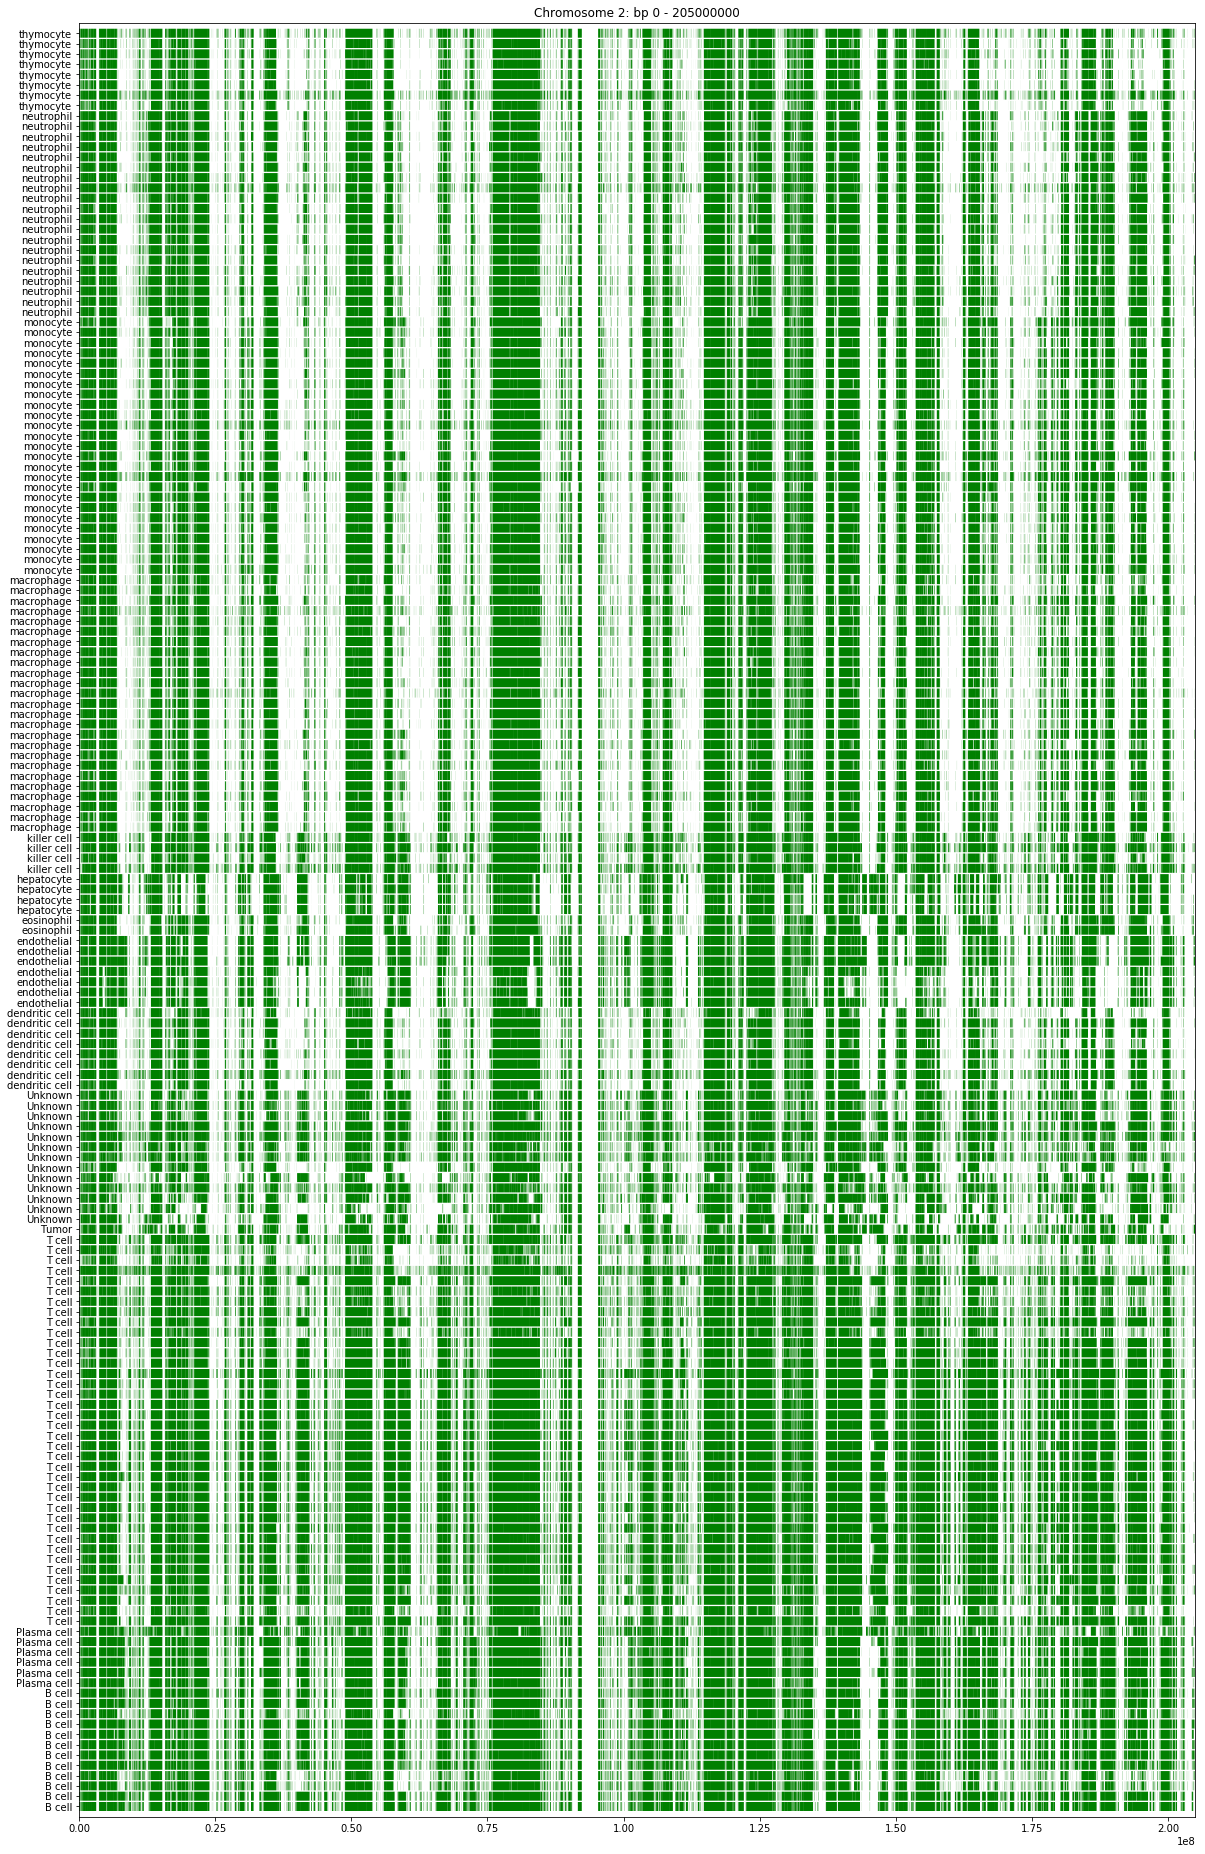

In [19]:
# Plotting gene tracks, originally used DNA Feature Viewer, but this only allowed for one sample per graph; 
# drawing plots using matplotlib path fxn.

window_start = 0
p_arm =  123400000    # Length of chr 1 is 255000000, p arm is 123400000

fig, ax = plt.subplots(figsize = (20,33))
sample_total = 173
track_label = []
chr_choice = 1
for sample_no in range(sample_total):    # Build up graph by drawing each sample
    
    sample = (meth_data_mouseless.iloc[sample_no]['Full Sample']) 
    sample_chr1 = sample.loc[sample["Chr"] == str(chr_choice)]
    if(len(sample_chr1) == 0):     # Some of the chromosome numbers are imported as int's and some as strings >:(
        sample_chr1 = sample.loc[sample["Chr"] == int(chr_choice)]
    sample_chr1 = sample_chr1.loc[sample_chr1["Segment"] == "PMD"]
    sample_chr1 = sample_chr1.loc[sample_chr1["IRangeMax"] <= p_arm]

    feature_start = sample_chr1["IRangeMin"]    # Vertices of colored segment
    if(len(feature_start) == 0):
        feature_start = pd.DataFrame([0,0])
    feature_end = sample_chr1["IRangeMax"]
    if(len(feature_end) == 0):
        feature_end = pd.DataFrame([0,0])
    
    vert_start = (feature_start.iloc[0], sample_no)  # Initializing vertices
    vert_end = (feature_end.iloc[0], sample_no)
    
    vertices = [ vert_start, vert_end ]   # Initializing list of vertices and codes
    codes = [
        matplotlib.path.Path.MOVETO,   # Picks up pen
        matplotlib.path.Path.LINETO    # Draws
    ]
    
    for i in range(1, len(feature_start)):  # Add coordinates and coding of each PMD line; starts at 1 because the first points have been initialized
        vert_start = (feature_start.iloc[i], sample_no)  # Initializing vertcs; x=IRangeMin or Max, y=height on graph
        vert_end = (feature_end.iloc[i], sample_no)
    
        vertices.append(vert_start)   # Plot coordinates of line to draw
        vertices.append(vert_end)
        codes.append(matplotlib.path.Path.MOVETO)
        codes.append(matplotlib.path.Path.LINETO)
        
    track_label.append(meth_data_mouseless.iloc[sample_no]['General Cell Type'])

    path = matplotlib.path.Path(vertices, codes)

    patch = matplotlib.patches.PathPatch(path, color='green', lw=sample_total/(sample_total/9))
    ax.add_patch(patch)
    ax.set_xlim(window_start, p_arm)
    ax.set_ylim(-1, sample_total)

locs = np.arange(0, sample_total)
plt.yticks(locs, track_label)
title = ('Chromosome ', chr_choice, ': bp 0 - ', p_arm)
plt.title('Chromosome ' + str(chr_choice) + ': bp 0 - ' + str(p_arm))
plt.savefig('PMD_tracks_faulty_chr_'+str(chr_choice))
plt.show() 

    
    

Now that some differences can be seen in the PMD-levels of various cell types, we can take the union of the PMDs in the same general cell group that are closer than a threshold amount. PyBedTools is the package Naveed recommends for this.

# Cleaning Data

The bisulfite sequencing was not completely successful or clean in all parts of samples and there are regions in different chromosomes with artificially high or low methylation levels. A column 'Faulty' will be added to each sample, labelling each PMD in an untrustworthy area as True if it is faulty.

Because pandas dataframe indexing takes long and past functions based on dataframe indexing have not compiled in a timely manner, relevant information is first put into a numpy array. The array will hold PMD coordinates and will consist of the samples as rows, and the columns as alternatiting first the starting PMD range and then a column of the end range of that PMD, organized by chromosome. 

Another function will then create a numpy array of the median PMD counts in each binned region of the chromosome. This will involve checking how many PMD's are in the current bin via a boolean array, and in another step check for PMDs spanning the bin. 

In [17]:
# Finds max value or counts (depending on count_bool) in column of choice 'column_param' out of all samples
def get_max_all_samples(df_all_samples, column_param, option):   
    max_range = 0
    if option == 'max_val':  # Don't return counts, but maximum of values
        for sample_no in range(len(df_all_samples)):      # Find highest base pair index
            current_max = (df_all_samples.iloc[sample_no]['Full Sample'][column_param]).max()
            if max_range < current_max:
                max_range = current_max
            
    if option == 'max_count':  # Return maximum amounts / counts of the column_param
        for sample_no in range(len(df_all_samples)):      # Find highest base pair index
            sample = df_all_samples.iloc[sample_no]['Full Sample']
            sample = sample.loc[sample['Segment'] == 'PMD']
            current_count = len(sample[column_param])
            if max_range < current_count:
                max_range = current_count
        
    return max_range

In [18]:
# Function that returns list of max counts for each category in slice_param, ie the maximum num of 
# IRangeMin in each Chromosome
    
def get_max_count_by_slice(df_all_samples, column_to_count, slice_param):
    max_counts = list()
    slice_param_names = df_all_samples.iloc[0]['Full Sample'][slice_param].unique()
    for slice_name in slice_param_names:    # For example current_chromosome in chromosome_names
        max_count = 0
        for sample_no in range(len(df_all_samples)):      # Find highest base pair index
            sample = df_all_samples.iloc[sample_no]['Full Sample']
            sample = sample.loc[sample['Segment'] == 'PMD']
            sample = sample.loc[sample[slice_param] == slice_name]   # Slice: PMDs in Chr in sample
            current_count = len(sample[column_to_count])
            if max_count < current_count:
                max_count = current_count
        max_counts.append(max_count)
        
    return max_counts

In [19]:
# Function for listing all the PMD locations (IRangeMin and Max) in a np table. The rows are samples, columns 
# are alternating start and end PMD ranges. Proceeding columns are increasing in range and organized by chrom.
# # May be confusing due to differences in indexing np.array and pd.DataFrame

def df_meth_info_to_np(df_all_samples, max_ranges_by_chrom):
    # Some names and indices predefined that would have to get called in every loop
    # Col names
    chrom_names = (df_all_samples.iloc[0]['Full Sample']['Chr Index']).unique() # WORKS
    df_full_column_names = list(df_all_samples.columns)
    sample_column_names = list(df_all_samples.iloc[0]['Full Sample'].columns)
    # Indices
    chr_index = sample_column_names.index('Chr Index')     # Numpy indexes with numbers only not column names
    segment_index = sample_column_names.index('Segment')
    irange_min_index = sample_column_names.index('IRangeMin')
    irange_max_index = sample_column_names.index('IRangeMax')
    full_sample_index = df_full_column_names.index('Full Sample')
    # Max's
    max_range_count = sum(max_ranges_by_chrom)  # Gets max amount of all samples
    
    
    # Table of PMD locations; rows = sample number, columns is pmd range
    sample_pmd_ranges = np.zeros([len(df_all_samples), max_range_count*2])
    df_all_samples_np = df_all_samples.to_numpy()  # Rows correspond to sample num
    
    # Filling table
    for sample_no in range(len(df_all_samples_np)):    # Make new array of PMD ranges for each chromosome and append
        # Using .index() to get np column equivalent to its dataframe column
        sample = df_all_samples_np[sample_no][full_sample_index].to_numpy()   # Get next sample
        single_sample_pmd_ranges = np.empty([0,2])   # 2D row vector. Fill with PMD ranges of current sample 
        
        chr_i = 0   # iterator for chromosome loop
        for curr_chromosome in (chrom_names):   
            # Get IRange columns of curr chrom
            sample_by_chr = sample[   (sample[:, chr_index] == curr_chromosome),    :] # Only take pmd's in current chrom
            sample_by_chr = sample_by_chr[ (sample_by_chr[:,  segment_index] == 'PMD'), :]   # Isolate PMD's
            sample_by_chr_min = sample_by_chr[:, irange_min_index]          
            sample_by_chr_max = sample_by_chr[:, irange_max_index]          
            sample_by_chr = np.array(list(zip(sample_by_chr_min, sample_by_chr_max)))   # Min & max range in neighboring columns
            

            # Pad current chromosome row 
            padding_length = max_ranges_by_chrom[chr_i] - len(sample_by_chr)   # Padding for sample_by_chr to make dimensions within chrom equal
            if padding_length >0:
                sample_by_chr = np.concatenate((sample_by_chr, np.full((padding_length, 2), np.nan)))
        
            single_sample_pmd_ranges = np.append(single_sample_pmd_ranges, sample_by_chr)
            chr_i = chr_i+1
    
        # Append pmd locations of current sample to list of all samples
        sample_pmd_ranges[sample_no] = single_sample_pmd_ranges
        
    return sample_pmd_ranges    # Returning max_ranges_by_chrom since it's a slow fxn to re-calculate
        

In [20]:
# Counts the number of PMD per bin_size: pmd_locs_chr_min means min ranges of PMDs in chr; max_range is the highest-index the bins should go to

def count_pmds(pmd_locs_chr_min, pmd_locs_chr_max, bin_size, max_range):    
    # Should only be applied to individual chromosomes
    sample_total_num = len(pmd_locs_chr_min)
    
    bins = np.arange(bin_size,max_range, step=bin_size)   # Bins as high as largest choromosome index 
    pmd_counts = np.full((len(bins), sample_total_num),0)
    
    for i, higher_bin in enumerate(bins):
        # Count PMDs actually in bin
        print('i',i)
        
        
        lower_bin = higher_bin - bin_size
        bool_min = np.logical_and(pmd_locs_chr_min<=higher_bin, pmd_locs_chr_min>lower_bin)  # True ranges are in PMD
        bool_max = np.logical_and(pmd_locs_chr_max<=higher_bin, pmd_locs_chr_max>lower_bin)

        bool_sum = np.array((np.sum(bool_min, axis=1), np.sum(bool_max,axis=1)))   # Total num PMDs in bin

        pmd_counts_bin = np.amax(bool_sum, axis=0)   # Max of each row, so if there are more max PMD ranges than min ranges, that would be the number of PMDs found in this bin


        # Count PMDs potentially spanning the bin: get the index in the pmd locations array of the first/smallest
        # min range that was marked as 'True' for being in the current bin. Check if the max range corresponding 
        # to the min range right before the first min range in the bin, ie with an index one lower, is greater
        # than the lower end of the bin. This is for PMDs that are spanning across the current bin. 

        
        
        
        # THIS PART COUNTS PMD'S POTENTIALLY SPANNING THE CURRENT BIN, TAKES TOO LONG THOUGH 
#         span_pmd_idx = np.argmax((bool_min==True), axis = 1) -1    # DELETE
#         span_pmd_idx = np.full((sample_total_num,2), np.nan)   # Init: Index of the max corresponding to the min right before bin
#         for ix, value in np.ndenumerate(bool_min):
#             if value:    # If this min is in the bin (ie True)
#                 ix_span = list(ix)   # Can't modify tuples, turn into list
#                 ix_span[1] = ix[1]-1
#                 if np.isnan(span_pmd_idx[ix[0], 0]):    # If this 'True' is the first True encountered in the row, save its index
#                     span_pmd_idx[ix[0]] = ix_span
            
            
#         # Slice away indices that start before 0 and nan's
#         span_pmd_idx = (np.asarray([value for value in (span_pmd_idx) if value[1]>0])).astype(int)
        
# #         span_pmd_idx = span_pmd_idx[~(np.isnan(span_pmd_idx))]   # Slice the indices that are no nan and where the column is greater than 0 (which cuts away spanning pmd's that would have started in the previous chromosome)
    
#         if len(span_pmd_idx) > 0: 
#             span_pmds = np.full((pmd_counts_bin.shape), 0)    # Array like pmd_counts_bin
#             span_pmds[span_pmd_idx[:,0]] = (pmd_locs_chr_max[span_pmd_idx[:,0],span_pmd_idx[:,1]] > lower_bin)
#         else: span_pmds = 0
            
# #         print(span_pmds)
            
#         pmd_counts_bin = (pmd_counts_bin) + (span_pmds)     # Add these bin-encompassing PMD counts to the total PMD count  
        
#         print('i',i)
        pmd_counts[i] = pmd_counts_bin

    return pmd_counts     # 'medians' vector of median PMD amounts per bin for the chromosome fed to this function



In [21]:
# Get median PMD counts per bin from numpy array of start and end PMD ranges
def get_median_bins3(df_all_samples, pmd_locations_all, max_ranges_by_chrom, bin_size): #(df_all_samples, bin_size):
    
    # IN BIN: Count PMD's as list of counts per sample, flag if there are any running into next bin and
    # unflag if the first range in the next bin is an 'end' range
#     pmd_locations_all, max_ranges_by_chrom = df_meth_info_to_np(df_all_samples)   # Get array of PMD locations
    
    pmd_locs_min = pmd_locations_all[:, ::2]   # WORKS
    pmd_locs_max = pmd_locations_all[:, 1::2]
    
    max_range = get_max_all_samples(df_all_samples, 'IRangeMax', 'max_val')   # PMD with highest bp index 
    max_ranges_by_chrom = np.dot(max_ranges_by_chrom, 2)  # Used in df_meth_info_to_np on both min and max ranges, meaning twice the padding is added 
    
    binned_medians = list()   
    
    for chr_i in range(len(max_ranges_by_chrom)):    # Bin numbers have to start anew with each chrom since bp numbering starts from 0 in each chrom
        if chr_i <= 0:  
            prev_index = 0    # Chromosome index only has endpoints, must initiate start point
        else: prev_index = np.sum(max_ranges_by_chrom[0:(chr_i - 1)])
        
        chr_slice_max = prev_index + max_ranges_by_chrom[chr_i]
        pmd_locs_chr_min = pmd_locs_min[:, prev_index:chr_slice_max]   # Only take current chromosome
        pmd_locs_chr_max = pmd_locs_max[:, prev_index:chr_slice_max]   # Need to do these separately to check for PMD's running across bins

        pmd_counts_bin = count_pmds(pmd_locs_chr_min,pmd_locs_chr_max,bin_size, max_range)
        medians = np.median(pmd_counts_bin, axis = 1)   # Add the median of the current bin to the list of medians 
        binned_medians.append(medians)
        
        
    return binned_medians
    
    

In [24]:
# Function to add 'Faulty' column to each sample, labelling the segment as false if the PMD count is within +/- 50% of the 
# median PMD count for that bin.

def label_samples_faulty(df_all_samples, medians, max_ranges_by_chrom, bin_size):  
    
    max_bin_ranges = (df_all_samples.to_numpy)[:,(max_ranges_by_chrom -1)]
    bins = inc by binsize until max range of that chr index, ie the last PMD bp in pmd_locations_all
    bins = np.arange(bin_size, )
    
    low_bound_cond = (medians - (0.5 * medians))
    high_bound_cond = (medians + (0.5 * medians))
    
    for sample_no in range(len(df_all_samples)):
        sample = df_all_samples.iloc[sample_no]["Full Sample"]    # Get curr sample
        pmd_counts = count_pmds(sample)
        sample['Faulty'] = np.logical_and(pmd_counts < high_bound_cond, pmd_counts > low_bound_cond)
        
    
    current sample['Faulty'] = bool vector of PMD counts being within 50% of median
    
    

SyntaxError: invalid syntax (<ipython-input-24-a068440b9d0d>, line 7)

In [28]:
# Labelling the faulty PMDs

max_ranges_by_chrom = get_max_count_by_slice(meth_data_mouseless, 'IRangeMin', 'Chr')  # Max count of IRangeMin in each Chromosome
max_ranges_by_chrom = np.dot(max_ranges_by_chrom, 2)
    # Max count of IRangeMin in each Chromosome
    # ^^The INDEX for chromosomes in pmd_locations_all is given by 2* get_max_count_by_slice, which gives the 
    #   count of IRangeMin and thus the number of PMD's in each region. Should be multiplied by two since the
    #   PMD array pmd_locations_all has a start and end range for each PMD, so each region corresponding to a 
    #   chromosome is twice as large as given by get_max_count_by_slice. There are 24 diff chromosomes. Multiplied by 
    #   2 because each PMD represented by 2 range parameters.

pmd_locations_all = df_meth_info_to_np(meth_data_mouseless, max_ranges_by_chrom)




In [ ]:
# Get matrix of median pmd counts per bin

medians = get_median_bins3(meth_data_mouseless, pmd_locations_all, max_ranges_by_chrom, bin_size)

In [ ]:
# Labelling regions badly sequenced
meth_data_mouseless = label_samples_faulty(meth_data_mouseless, medians, max_ranges_by_chrom, bin_size)
# print(pmd_locations_all.shape)   # Has no 'shape' cuz df_meth_info_to_np returns tuple
print(pmd_locations_all[0:100])

# TODO: ABSTRACT AWAY THAT BAD BOI FUNCTION MAX RANGE BY SLICE

In [ ]:
# TEST AHHH
pmd_locations_all
pmd_locs_min = pmd_locations_all[:, ::2]   # WORKS
pmd_locs_max = pmd_locations_all[:, 1::2]


bin_size = 100000
chr_i = 1
if chr_i <= 0:  
    prev_index = 0    # Chromosome index only has endpoints, must initiate start point
else: prev_index = np.sum(max_ranges_by_chrom[0:(chr_i)])
    
chr_slice_max = prev_index + max_ranges_by_chrom[chr_i]
pmd_locs_chr_min = pmd_locs_min[:, prev_index:chr_slice_max]   # Only take current chromosome
pmd_locs_chr_max = pmd_locs_max[:, prev_index:chr_slice_max]   # Need to do these separately to check for PMD's running across bins


curr_bin = bin_size
lower_bin = curr_bin - bin_size

pmd_locs_bin_min = pmd_locs_chr_min
pmd_locs_bin_min[(pmd_locs_bin_min > curr_bin)] = np.nan     # Anything outside of current bin becomes nan
pmd_locs_bin_min[(pmd_locs_bin_min <= lower_bin)] = np.nan     


pmd_locs_bin_max = pmd_locs_chr_max
pmd_locs_bin_max[(pmd_locs_bin_max > curr_bin)] = np.nan     # Anything outside of current bin becomes nan
pmd_locs_bin_max[(pmd_locs_bin_max <= lower_bin)] = np.nan     



# BOOLEAN INDEXING DOES NOT MAINTAIN THE OG DIMENSIONS INSTEAD FLATTENS ALL THE TRUES TO COME AFTER ANOHTER 1D
bool_min = (pmd_locs_bin_min <= curr_bin)
# bool_max = (pmd_locs_sliced_min > lower_bin)

span_pmd_idx = np.argmax((bool_min==True), axis = 1)
span_pmd_idx = np.full((len(bool_min),2), np.nan)   # Initialize list
for i, value in np.ndenumerate(bool_min):
    if value:    # If this min is in the bin (ie True)
        i_span = list(i)
        i_span[1] = i[1]-1
        if np.isnan(span_pmd_idx[i[0], 0]):    # If this 'True' is the first True encountered in the row, save its index
            span_pmd_idx[i[0]] = i_span
            
            
# Return the indices if the current element is true and the previous element in same row is false
# span_pmd_idx = [i for i, x in np.ndenumerate(bool_min) if (x and not bool_min[i-1])]  #np.argmin(([i for i, x in np.ndenumerate(bool_min) if (x and bool_min[i-1])]), axis =1)     # Enumerate returns coordinates and value
print('span_pmd_idx', (span_pmd_idx))

In [430]:
max(pmd_locs_sliced_max, np.full((len(pmd_locs_sliced_max)), curr_bin))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [238]:
# TEST for get_median_bins3
bin_size = 150000
# pmd_counts = count_pmds()
# print(pmd_locations_all)
binned_medians = get_median_bins3(meth_data_mouseless, pmd_locations_all, max_ranges_by_chrom, bin_size)
print(binned_medians[0:100])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less_equal
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [338]:
# TEST print binned meds
print(binned_medians[10000:11000])

3.0


In [332]:
# TEST 
print((pmd_locations_all[:, 0:3122]))

[[4.00340000e+04 1.33469000e+05 1.48985000e+05 ...            nan
             nan            nan]
 [5.17760000e+04 1.35108000e+05 1.40484000e+05 ...            nan
             nan            nan]
 [1.00000000e+04 1.99910000e+04 3.61130000e+04 ... 2.49106231e+08
  2.49207719e+08 2.49240621e+08]
 ...
 [4.64820000e+04 1.33405000e+05 1.68006000e+05 ...            nan
             nan            nan]
 [4.94590000e+04 1.32989000e+05 7.71955000e+05 ...            nan
             nan            nan]
 [5.16380000e+04 1.34279000e+05 1.38844000e+05 ...            nan
             nan            nan]]


In [ ]:
# Cleaning empty or overly full parts of the PMD calls
# First need the median PMD count per bin for all samples, compare this to the median PMD count of each sample

# meth_data_mouseless

bin_size = 10000

# median_PMD_count_df = get_median_bins2(meth_data_mouseless, bin_size)
# print(median_PMD_count_df)

# meth_data_mouseless["sample"]["Faulty Regions"] = annotate_as_faulty(sample, median_PMD_count_df)   # Faulty / Not


# BedTools Analysis

In [71]:
# Saving PMD bed files by general cell type for bed-tools use, such as merge, intersect, union of pmd regions

# Convert DataFrame to BedTool object, then use .saveas() method
string_data = str(meth_data_mouseless.iloc[0]['Full Sample'])
string_data = string_data.loc[string_data["Segment"] == "PMD"]

# print(string_data)
bedtool = pybedtools.bedtool.BedTool(string_data, from_string = True)

result = bedtool.saveas('py_bed_random.bed')

# Visualizing: PMD Variation by Cell Type

Looking at the regions in the cell that have the most variation among different types of cell. Excluding 'Mouse' consortium from this. 

# Hierarchical Clustering

Get a dendrogram of samples based on PMD's to see which samples cluster together the most and if the lineage of the cell samples can be captured by the clustering. To perform hierarchical clustering, get the distance matrix first using scipy.cluster.hierarchy.linkage() and then plot with scipy.cluster.hierarchy.dendrogram(). 

Since hierarchical clustering takes up a lot of memory, binned PMDs should be used.

In [ ]:

from sklearn.cluster import AgglomerativeClustering

pmd_locations_all_int = (pmd_locations_all)
pmd_locations_all_int[(pmd_locations_all_int) == np.nan] == 0 
pmd_locations_all_int = pmd_locations_all_int.astype(int)
print(pmd_locations_all_int[pmd_locations_all_int ==0])


t0 = time()
clustering = AgglomerativeClustering().fit(np.transpose(pmd_locations_all_int))
print('time:', (time() - t0))
print(clustering)




print(len(clustering.labels_))
